In [2]:
import pandas as pd
import numpy as np

In [3]:
df =pd.read_csv('Social.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
X= df[['Age','EstimatedSalary']]
Y=df['Purchased']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=0 )

In [7]:
Y_train.shape

(320,)

In [8]:
Y_train.head()

336    1
64     0
55     0
106    0
300    1
Name: Purchased, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,Y_train)
pred=lg.predict(X_test)

In [9]:
print(pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 1]


In [14]:
print('Expected output :', Y_test[:10])
print('-'*15)
print('Predicted output :', pred[:10])

Expected output : 132    0
309    0
341    0
196    0
246    0
60     0
155    0
261    1
141    0
214    0
Name: Purchased, dtype: int64
---------------
Predicted output : [0 0 0 0 0 0 0 1 0 1]


In [15]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score

In [17]:
print(accuracy_score(Y_test,pred))

0.8875


In [19]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        58
           1       0.76      0.86      0.81        22

    accuracy                           0.89        80
   macro avg       0.85      0.88      0.86        80
weighted avg       0.89      0.89      0.89        80



In [24]:
matrix=confusion_matrix(Y_test,pred,labels=lg.classes_)
print(matrix)

[[52  6]
 [ 3 19]]


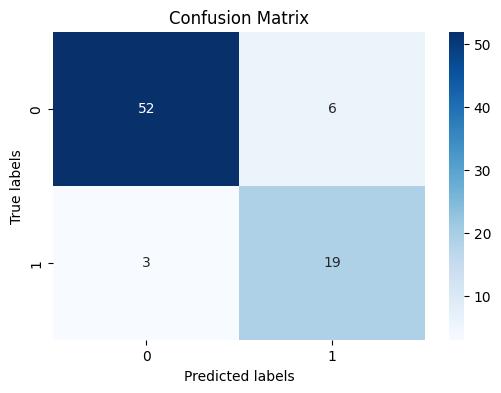

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues')

# Add labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [33]:
TP = matrix[1, 1]
FP =matrix[0, 1]
TN =matrix[0, 0]
FN = matrix[1, 0]

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

True Positives (TP): 19
False Positives (FP): 6
True Negatives (TN): 52
False Negatives (FN): 3
